In [142]:
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('tarantino.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Data columns (total 4 columns):
movie         1894 non-null object
type          1894 non-null object
word          1704 non-null object
minutes_in    1894 non-null float64
dtypes: float64(1), object(3)
memory usage: 74.0+ KB


In [143]:
df.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


WOW! We have data to look at. First we are going to count just the number of fucks.

In [144]:
print df['word']

0                dick
1               dicks
2              fucked
3             fucking
4            bullshit
5                fuck
6                shit
7                fuck
8               dicks
9                fuck
10               dick
11               dick
12               dick
13               dick
14               dick
15               dick
16               dick
17              dicks
18       motherfucker
19               dick
20              pussy
21              fucks
22               fuck
23            fucking
24               hell
25            fucking
26            fucking
27               dick
28                jap
29               fuck
            ...      
1864    motherfucking
1865              ass
1866    motherfucking
1867             fuck
1868          goddamn
1869          fucking
1870              ass
1871     motherfucker
1872     motherfucker
1873          n-word 
1874             shit
1875              ass
1876          dumbass
1877         bullshit
1878      

In [145]:
df['word'].dropna()
df['word'].str.contains("fuck") # check if the word fuck appears in the word

0       False
1       False
2        True
3        True
4       False
5        True
6       False
7        True
8       False
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18       True
19      False
20      False
21       True
22       True
23       True
24      False
25       True
26       True
27      False
28      False
29       True
        ...  
1864     True
1865    False
1866     True
1867     True
1868    False
1869     True
1870    False
1871     True
1872     True
1873    False
1874    False
1875    False
1876    False
1877    False
1878     True
1879    False
1880    False
1881    False
1882    False
1883    False
1884    False
1885     True
1886    False
1887     True
1888     True
1889     True
1890    False
1891     True
1892    False
1893      NaN
Name: word, dtype: object

# Fuck (Marry) Kill movie ratings
We plan on building a rating system for Tarantino movies that is based on what happens more in a specific film; the word fuck, (someone marrying not implemented), or someone dying.

In [146]:
kill = {}
fuck = {}
for val in df.iterrows():
    if val[1][1] == "death":
        if val[1][0] not in kill:
            kill[val[1][0]] = 1
        else:
            kill[val[1][0]] += 1
    else:
        if 'fuck' in val[1][2]:
            if val[1][0] not in fuck:
                fuck[val[1][0]] = 1
            else:
                fuck[val[1][0]] += 1

In [147]:
print kill

{'Pulp Fiction': 7, 'Reservoir Dogs': 10, 'Jackie Brown': 4, 'Kill Bill: Vol. 2': 11, 'Kill Bill: Vol. 1': 63, 'Inglorious Basterds': 48, 'Django Unchained': 47}


In [148]:
print fuck

{'Pulp Fiction': 267, 'Reservoir Dogs': 271, 'Jackie Brown': 140, 'Kill Bill: Vol. 2': 24, 'Kill Bill: Vol. 1': 17, 'Inglorious Basterds': 21, 'Django Unchained': 32}


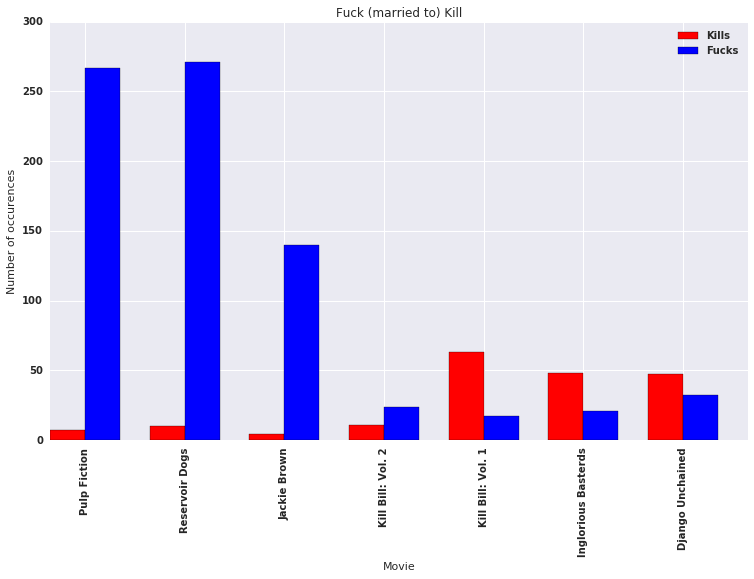

In [155]:
N = 7
ind = np.arange(N)
width = .35

movies = []
for key in kill:
    movies.append(key)

kills = []
for key in kill:
    kills.append(kill[key])
    
fucks = []
for key in fuck:
    fucks.append(fuck[key])

fig, ax = plt.subplots()
rects1 = ax.bar(ind, kills, width, color='r')
rects2 = ax.bar(ind + width, fucks, width, color='b')


mpl.rcParams.update({'font.size': 100})

ax.set_ylabel("Number of occurences")
ax.set_xlabel("Movie")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(movies)
ax.legend((rects1[0], rects2[0]), ('Kills', 'Fucks'))
plt.setp(labels, rotation = 90)
ax.set_title('Fuck (married to) Kill')
fig.set_size_inches(12.5, 7.5)

plt.savefig('graph.png')

plt.show()